<a href="https://colab.research.google.com/github/KaushikPalani/Classification_of_bearing_faults_using_ML/blob/main/ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load necessary packages and libraries

In [1]:
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
# Load IE signals
X = np.load('sdnet_dataset.npy')
#print(X.shape)
#plt.plot(X[0])

# Upload the labels
y = np.load('sdnet_labels.npy')
y = y - 1
#print(y.shape)
#print(f'Label for first IE signal: {y[0]}')

# Create the one-hot encoded labels
y_oh = np.zeros((y.size, np.max(y) + 1))
y_oh[np.arange(y.size), y] = 1
print(X.shape, y.shape, y_oh.shape)

(1936, 2000) (1936,) (1936, 3)


In [3]:
# Reshape the data
X = X.reshape([-1,X.shape[1],1])
print(X.shape)

# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, train_size = 0.75, test_size = 0.25, random_state=10)

(1936, 2000, 1)


Convolutional Neural Network

In [16]:
# Define a 1D CNN
model = models.Sequential([
    layers.Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPool1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(3),
    layers.Softmax()
    ])

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [17]:
# Train the model
model.fit(X_train, y_train, epochs = 50)

# Evaluate accuracy on the training set
train_loss, train_accuracy, train_precision, train_recall = model.evaluate(X_train, y_train)
print('Train accuracy =', train_accuracy*100, 'Train Recall =', train_recall*100, 'Train Precision =', train_precision*100)

# Evaluate accuracy on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print('Test accuracy =', test_accuracy*100, 'Test Recall =', test_recall*100, 'Test Precision =', test_precision*100)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - categorical_accuracy: 0.7258 - loss: 0.9231 - precision_5: 0.5673 - recall_5: 0.2298
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.7455 - loss: 0.6997 - precision_5: 0.7570 - recall_5: 0.7044
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.7642 - loss: 0.6129 - precision_5: 0.7664 - recall_5: 0.7498
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.7589 - loss: 0.5974 - precision_5: 0.7670 - recall_5: 0.7482
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.7739 - loss: 0.6117 - precision_5: 0.7743 - recall_5: 0.7584
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.8022 - loss: 0.5213 - precision_5: 0.8069 - recall_5: 0.7964
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.8064 - loss: 0.5243 - precision_5: 0.8132 - recall_5: 0.7941
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━

In [18]:
# Print model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)                   │ (None, 1998, 16)            │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_20 (MaxPooling1D)      │ (None, 999, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 997, 32)             │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 498, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 496, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_22 (MaxPooling1D)      │ (None, 248, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 246, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_23 (MaxPooling1D)      │ (None, 123, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 15744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │       2,015,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             195 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_5 (Softmax)                  │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,056,357 (7.84 MB)

 Trainable params: 2,056,355 (7.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Confusion Matrix Calculation

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


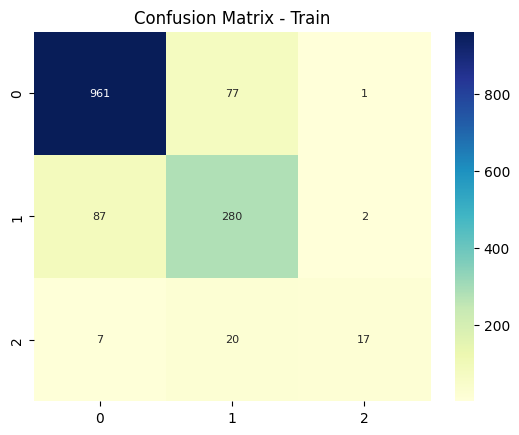

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


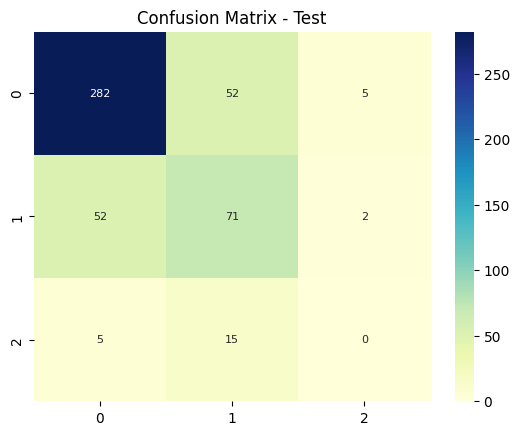

In [19]:
def Confusion_Matrix(model, X, y):
  y_pred = np.argmax(model.predict(X), axis=1)
  conf_mat = confusion_matrix(np.argmax(y, axis=1), y_pred)
  return conf_mat

plt.figure(1)
plt.title('Confusion Matrix - Train')
sns.heatmap(Confusion_Matrix(model, X_train, y_train) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(2)
plt.title('Confusion Matrix - Test')
sns.heatmap(Confusion_Matrix(model, X_test, y_test) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()